Bayesian Network to model the influence of various cyber features in intrusion detection

In [1]:
import pandas as pd
import numpy as np
from pgmpy.estimators import ExhaustiveSearch,HillClimbSearch,K2Score, PC,TreeSearch

In [2]:
use_case ='UC3'
path_dataset = 'C:\\Users\\substationc\\Desktop\\DataFusion\\DataFusionApp\\DataFusionApp\\PythonScripts\\csvs\\'+use_case

master_file = path_dataset+'\\uc3_merged_phy_cyb_10os_30poll_encoded.csv'
os_file = path_dataset+'\\uc3_DS_merged_phy_cyb_10os_30poll_encoded.csv'
router_file = path_dataset+'\\uc3_router_merged_phy_cyb_10os_30poll_encoded.csv'

In [3]:
master_data = pd.read_csv(master_file)
os_data = pd.read_csv(os_file)
router_data = pd.read_csv(router_file)

In [4]:
master_data['Time'] = master_data['Time'].astype(str)
master_data['Time'] = pd.to_datetime(master_data['Time'], format ='%Y-%m-%d %H:%M:%S.%f')
#master_data['Time'] = pd.to_datetime(master_data['Time']).values.astype(np.int64)// 10**6

os_data['Time'] = os_data['Time'].astype(str)
os_data['Time'] = pd.to_datetime(os_data['Time'], format ='%Y-%m-%d %H:%M:%S.%f')
#os_data['Time'] = pd.to_datetime(os_data['Time']).values.astype(np.int64)// 10**6

router_data['Time'] = router_data['Time'].astype(str)
router_data['Time'] = pd.to_datetime(os_data['Time'], format ='%Y-%m-%d %H:%M:%S.%f')
#router_data['Time'] = pd.to_datetime(router_data['Time']).values.astype(np.int64)// 10**6

In [5]:
master_data.head(5)

,Unnamed: 0,frame_len,frame_protocols,eth_src,eth_dst,ip_src,ip_dst,ip_len,ip_flags,tcp_srcport,...,AL_dnp3_al_ctl,AL_dnp3_obj,DNP3 Object Count,DNP3 Objects,AL_Payload,value1,value2,value3,value4,value5
0,0,72,1,1,0,1,2,11,1,2,...,6,1,55,2,83,NaN,NaN,79.8731,NaN,NaN
1,1,286,1,0,1,2,1,9,1,1,...,0,1,42,1,19,NaN,NaN,79.8731,NaN,1236.1
2,2,72,1,1,0,1,2,11,1,6,...,4,1,33,0,196,NaN,NaN,79.8731,1005.24,1236.1
3,3,239,1,0,1,2,1,7,1,1,...,13,2,36,511,293,NaN,NaN,79.8731,1005.24,1236.1
4,4,72,1,1,0,1,2,11,1,4,...,1,1,38,1,262,NaN,1211.67,79.8731,1005.24,1236.1


In [6]:
# rename the column name of each table to merge 
master_data.columns = ['M'+col_name for col_name in master_data.columns]
os_data.columns = ['O'+col_name for col_name in os_data.columns]
router_data.columns = ['R'+col_name for col_name in router_data.columns]

In [7]:
# join all the table with a resolution of 10 sec
master_data = master_data.set_index('MTime')
os_data = os_data.set_index('OTime')
router_data = router_data.set_index('RTime')
master_resample = master_data.resample('10S').mean()
os_resample = os_data.resample('10S').mean()
router_resample = router_data.resample('10S').mean()
res = master_resample.join(os_resample)
res = res.join(router_resample)

In [8]:
res

,MUnnamed: 0,Mframe_len,Mframe_protocols,Meth_src,Meth_dst,Mip_src,Mip_dst,Mip_len,Mip_flags,Mtcp_srcport,...,RTL_dnp3_tr_ctl,RAL_dnp3_al_func,RAL_dnp3_al_ctl,RAL_dnp3_obj,RDNP3 Object Count,RAL_Payload,Rvalue1,Rvalue2,Rvalue3,Rvalue4
MTime,,,,,,,,,,,,,,,,,,,,,
2020-10-17 16:23:40,1.5,167.250000,1.000000,0.500000,0.500000,1.500000,1.500000,9.500000,1.000000,2.500000,...,0.0,129.0,5.666667,1.333333,37.000000,172.000000,NaN,NaN,NaN,1350.5500
2020-10-17 16:23:50,7.0,132.428571,1.000000,0.571429,0.428571,1.428571,1.571429,8.428571,1.000000,4.142857,...,0.0,129.0,7.142857,1.714286,31.285714,182.857143,-56.257100,1211.670000,NaN,1350.5500
2020-10-17 16:24:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-10-17 16:24:10,13.0,155.000000,1.000000,0.400000,0.600000,1.600000,1.400000,7.200000,1.000000,3.000000,...,0.0,129.0,6.000000,1.000000,33.400000,120.600000,-56.257100,1211.670000,79.8731,1350.5500
2020-10-17 16:24:20,19.0,117.000000,0.857143,0.428571,0.571429,1.285714,1.285714,8.714286,0.857143,4.285714,...,0.0,129.0,6.428571,1.285714,31.285714,139.857143,-56.353500,1204.460000,79.8731,1350.5500
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-10-17 16:37:40,306.0,42.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,129.0,9.000000,1.000000,55.000000,71.000000,-0.934492,1233.590000,81.4584,43.2023
2020-10-17 16:37:50,309.5,153.833333,1.000000,0.500000,0.500000,1.500000,1.500000,8.500000,1.000000,3.333333,...,0.0,129.0,5.666667,1.500000,34.666667,201.500000,-0.934492,1229.293333,81.4584,1223.8800
2020-10-17 16:38:00,314.5,139.500000,1.000000,0.500000,0.500000,1.500000,1.500000,7.750000,1.000000,2.250000,...,0.0,129.0,9.500000,1.750000,30.500000,144.250000,-68.920000,1220.700000,81.4584,1223.8800


In [9]:
# analysing the relationship based on source and destination IP address of all the nodes
res_eth = res[['Meth_src','Oeth_dst','Reth_dst','Reth_src','Meth_dst','Oeth_src']]
res_eth = res_eth.dropna()
res_eth

,Meth_src,Oeth_dst,Reth_dst,Reth_src,Meth_dst,Oeth_src
MTime,,,,,,
2020-10-17 16:23:40,0.500000,2.000000,1.333333,0.666667,0.500000,1.000000
2020-10-17 16:23:50,0.571429,1.285714,1.142857,0.857143,0.428571,1.714286
2020-10-17 16:24:10,0.400000,3.000000,1.000000,1.600000,0.600000,2.400000
2020-10-17 16:24:20,0.428571,1.714286,1.714286,1.142857,0.571429,1.285714
2020-10-17 16:24:40,0.600000,2.200000,0.800000,1.200000,0.400000,2.400000
...,...,...,...,...,...,...
2020-10-17 16:37:40,1.000000,3.000000,1.000000,0.000000,0.000000,1.000000
2020-10-17 16:37:50,0.500000,3.833333,1.500000,0.500000,0.500000,1.166667
2020-10-17 16:38:00,0.500000,2.750000,2.750000,1.500000,0.500000,1.750000


<AxesSubplot:xlabel='MTime'>

<Figure size 1080x504 with 0 Axes>

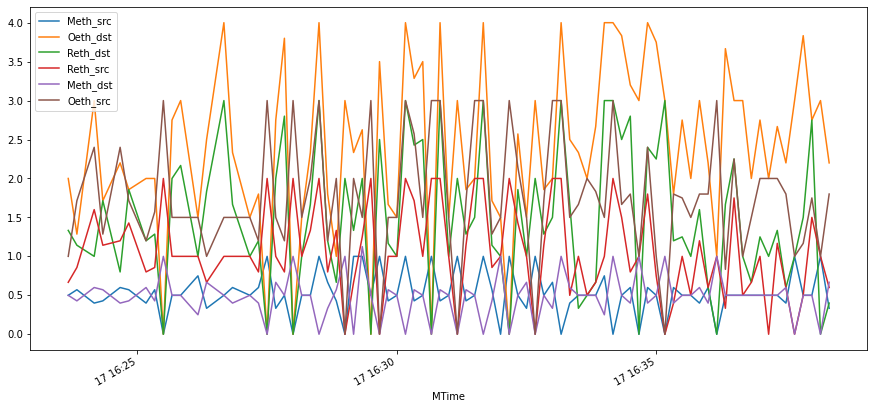

In [10]:
import matplotlib.pyplot as plt
plt.figure(figsize=(15,7))
res_eth.plot(figsize=(15,7))

In [11]:
# Lets discretise the values to 3 boundaries
CATS = 3

def boundary_str(start,end,cat):
    return f'{cat}: {start:+0,.2f} to {end:+0,.2f}'

def relabel(v,boundaries):
    if v>=boundaries[0][0] and v <=boundaries[0][1]:
        return boundary_str(boundaries[0][0], boundaries[0][1],cat='A')
    elif v>=boundaries[1][0] and v <=boundaries[1][1]:
        return boundary_str(boundaries[1][0], boundaries[1][1],cat='B')
    elif v>=boundaries[2][0] and v <=boundaries[2][1]:
        return boundary_str(boundaries[2][0], boundaries[2][1],cat='C')
    else:
        return np.nan

def get_boundaries(cats):
    prev_cat = cats[0]
    boundaries = [(prev_cat[0],prev_cat[prev_cat.shape[0]-1])]
    for index,cat in enumerate(cats):
        if index is not 0:
            boundaries.append((prev_cat[prev_cat.shape[0]-1], cat[cat.shape[0]-1]))
            prev_cat = cat
    return boundaries

new_columns= {}
for i, content in enumerate(res_eth.items()):
    (label,series) = content
    vals = np.sort(np.array([x for x in series.tolist()],dtype=float))
    boundaries = get_boundaries(cats=np.array_split(vals,CATS))
    new_columns[label] =[relabel(val,boundaries) for val in series.tolist()]
    
discrete_dt = pd.DataFrame(data=new_columns)
discrete_dt

<>:21: SyntaxWarning: "is not" with a literal. Did you mean "!="?
<>:21: SyntaxWarning: "is not" with a literal. Did you mean "!="?
<ipython-input-11-be7c473743a2>:21: SyntaxWarning: "is not" with a literal. Did you mean "!="?
  if index is not 0:


,Meth_src,Oeth_dst,Reth_dst,Reth_src,Meth_dst,Oeth_src
0,A: +0.00 to +0.50,A: +0.00 to +2.00,B: +1.00 to +1.86,A: +0.00 to +0.80,A: +0.00 to +0.50,A: +0.00 to +1.50
1,B: +0.50 to +0.57,A: +0.00 to +2.00,B: +1.00 to +1.86,B: +0.80 to +1.17,A: +0.00 to +0.50,B: +1.50 to +2.00
2,A: +0.00 to +0.50,B: +2.00 to +3.00,A: +0.00 to +1.00,C: +1.17 to +2.00,C: +0.50 to +1.12,C: +2.00 to +3.00
3,A: +0.00 to +0.50,A: +0.00 to +2.00,B: +1.00 to +1.86,B: +0.80 to +1.17,C: +0.50 to +1.12,A: +0.00 to +1.50
4,C: +0.57 to +1.00,B: +2.00 to +3.00,A: +0.00 to +1.00,C: +1.17 to +2.00,A: +0.00 to +0.50,C: +2.00 to +3.00
...,...,...,...,...,...,...
78,C: +0.57 to +1.00,B: +2.00 to +3.00,A: +0.00 to +1.00,A: +0.00 to +0.80,A: +0.00 to +0.50,A: +0.00 to +1.50
79,A: +0.00 to +0.50,C: +3.00 to +4.00,B: +1.00 to +1.86,A: +0.00 to +0.80,A: +0.00 to +0.50,A: +0.00 to +1.50
80,A: +0.00 to +0.50,B: +2.00 to +3.00,C: +1.86 to +3.00,C: +1.17 to +2.00,A: +0.00 to +0.50,B: +1.50 to +2.00
81,C: +0.57 to +1.00,B: +2.00 to +3.00,A: +0.00 to +1.00,B: +0.80 to +1.17,A: +0.00 to +0.50,A: +0.00 to +1.50


Bayesian Inference given a prior network model

In [12]:
# lets create a simple prior model in mind
from pgmpy.models import BayesianModel
from pgmpy.estimators import BayesianEstimator, MaximumLikelihoodEstimator
from IPython.core.display import display,HTML

display(HTML('<style>div.output_area pre {white-space: pre;}</style>'))

# assuming we are aware of the attacker model 
model = BayesianModel([('Reth_dst','Oeth_dst'),('Reth_dst','Meth_dst'),('Reth_src','Oeth_src'),
                       ('Reth_src','Meth_src'),('Oeth_src','Meth_dst'),('Meth_src','Oeth_dst')])

model.cpds=[]
model.fit(data=discrete_dt, estimator=BayesianEstimator,
         prior_type='BDeu',complete_samples_only=False)
for cpd in model.get_cpds():
    print(f'CPT of {cpd.variable}:')
    print(cpd,'\n')

CPT of Reth_dst:
+-----------------------------+----------+
| Reth_dst(A: +0.00 to +1.00) | 0.359848 |
+-----------------------------+----------+
| Reth_dst(B: +1.00 to +1.86) | 0.325758 |
+-----------------------------+----------+
| Reth_dst(C: +1.86 to +3.00) | 0.314394 |
+-----------------------------+----------+ 

CPT of Oeth_dst:
+-----------------------------+-----+-----------------------------+
| Meth_src                    | ... | Meth_src(C: +0.57 to +1.00) |
+-----------------------------+-----+-----------------------------+
| Reth_dst                    | ... | Reth_dst(C: +1.86 to +3.00) |
+-----------------------------+-----+-----------------------------+
| Oeth_dst(A: +0.00 to +2.00) | ... | 0.017543859649122806        |
+-----------------------------+-----+-----------------------------+
| Oeth_dst(B: +2.00 to +3.00) | ... | 0.3017543859649123          |
+-----------------------------+-----+-----------------------------+
| Oeth_dst(C: +3.00 to +4.00) | ... | 0.68070175438

C:\ProgramData\Anaconda3\lib\site-packages\pgmpy\models\BayesianModel.py:8: FutureWarning: BayesianModel has been renamed to BayesianNetwork. Please use BayesianNetwork class, BayesianModel will be removed in future.
  warnings.warn(


Structure Learning without any given model, using Chow Liu Tree Algorithm

In [13]:
est = TreeSearch(discrete_dt)
dag = est.estimate(estimator_type='chow-liu')
print(dag.edges())

Building tree:   0%|          | 0/15.0 [00:00<?, ?it/s]

[('Oeth_src', 'Reth_src'), ('Oeth_src', 'Reth_dst'), ('Reth_dst', 'Oeth_dst'), ('Reth_dst', 'Meth_src'), ('Meth_src', 'Meth_dst')]


Structure Learning without any given model, using Tree-Augmented Naive Bayes (TAN) structure from Data

In [14]:
est = TreeSearch(discrete_dt)
dag = est.estimate(estimator_type='tan')
print(dag.edges())

Building tree:   0%|          | 0/15.0 [00:00<?, ?it/s]

[('Oeth_src', 'Reth_dst'), ('Reth_dst', 'Oeth_dst'), ('Reth_dst', 'Meth_src'), ('Meth_src', 'Meth_dst'), ('Reth_src', 'Meth_src'), ('Reth_src', 'Oeth_dst'), ('Reth_src', 'Reth_dst'), ('Reth_src', 'Meth_dst'), ('Reth_src', 'Oeth_src')]


Structure Learning without any given model, using Hill Climbing Search Algo

In [15]:
scoring_method = K2Score(data=discrete_dt)
est = HillClimbSearch(data= discrete_dt)
est_model = est.estimate(scoring_method=scoring_method,max_iter=1e3,max_indegree=4)
print(est_model.edges())

  0%|          | 0/1000 [00:00<?, ?it/s]

[('Meth_src', 'Meth_dst'), ('Oeth_dst', 'Reth_dst'), ('Oeth_dst', 'Oeth_src'), ('Reth_dst', 'Oeth_src'), ('Oeth_src', 'Reth_src')]


In [16]:
est = PC(data=discrete_dt)
est_model = est.estimate(variant='orig')
print(est_model.edges())

  0%|          | 0/5 [00:00<?, ?it/s]

[('Meth_dst', 'Meth_src'), ('Reth_dst', 'Reth_src')]


Structure Learning with Exhaustive Search

In [ ]:
est = ExhaustiveSearch(discrete_dt)
for score,model in est.all_scores():
    print(score,model.edges())